# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.

## Task 1

In [3]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(readr)

fitness_data <- read_csv("fitness_class_2212.csv")

##a. State whether the values match the description given in the table above

unique_booking_id <- length(unique(fitness_data$booking_id)) == nrow(fitness_data)
valid_months_as_member <- all(fitness_data$months_as_member >= 1)
valid_weight <- all(fitness_data$weight >= 40)
valid_days_before <- all(fitness_data$days_before >= 1)
valid_day_of_week <- all(fitness_data$day_of_week %in% c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))
valid_time <- all(fitness_data$time %in% c("AM", "PM"))
valid_category <- all(fitness_data$category %in% c("Yoga", "Aqua", "Strength", "HIIT", "Cycling"), is.na(fitness_data$category))
valid_attended <- all(fitness_data$attended %in% c(0, 1))

unique_booking_id
valid_months_as_member
valid_weight
valid_days_before
valid_day_of_week
valid_time
valid_category
valid_attended
#recheck weight
valid_weight <- all(fitness_data$weight >= 40, is.na(fitness_data$weight))
valid_weight

##b. State the number of missing values in the column.

missing_booking_id <- sum(is.na(fitness_data$booking_id))
missing_months_as_member <- sum(is.na(fitness_data$months_as_member))
missing_weight <- sum(is.na(fitness_data$weight))
missing_days_before <- sum(is.na(fitness_data$days_before))
missing_day_of_week <- sum(is.na(fitness_data$day_of_week))
missing_time <- sum(is.na(fitness_data$time))
missing_category <- sum(is.na(fitness_data$category))
missing_attended <- sum(is.na(fitness_data$attended))

missing_booking_id
missing_months_as_member
missing_weight
missing_days_before
missing_day_of_week
missing_time
missing_category
missing_attended

##c. Describe what you did to make values match the description if they did not match
#Explore what could be wrong with the data
summary(fitness_data)

#transform missing values in months_as_member with the overall average month
avg_months_as_member <- mean(fitness_data$months_as_member, na.rm = TRUE)
fitness_data$months_as_member <- ifelse(is.na(fitness_data$months_as_member), avg_months_as_member, fitness_data$months_as_member)

#transform weight -> find non-numerical values and replace with the overall average weight
is_non_numeric <- !grepl("^[0-9]+(\\.[0-9]{1,2})?$", fitness_data$weight)
avg_weight <- mean(as.numeric(fitness_data$weight[!is_non_numeric]), na.rm = TRUE)
fitness_data$weight[is_non_numeric] <- avg_weight
summary(fitness_data$weight)

#transform days_before: delete "days" from character values and convert to numeric
unique(fitness_data$days_before)
fitness_data$days_before <- as.numeric(gsub(" days", "", fitness_data$days_before))
summary(fitness_data$days_before)

#transform day_of_week: keep only the first 3 characters
unique(fitness_data$day_of_week)
fitness_data$day_of_week <- substr(fitness_data$day_of_week, 1, 3)
unique(fitness_data$day_of_week)

#transform category and replace missing values with "unknown"
unique(fitness_data$category)
fitness_data$category <- ifelse(fitness_data$category == "-", "unknown", fitness_data$category)
unique(fitness_data$category)

# Remove rows with missing values in the attended
fitness_data <- fitness_data[!is.na(fitness_data$attended), ]

##c. Describe what you did to make values match the description if they did not match
#Explore what could be wrong with the data
summary(fitness_data)

#transform missing values in months_as_member with the overall average month
avg_months_as_member <- mean(fitness_data$months_as_member, na.rm = TRUE)
fitness_data$months_as_member <- ifelse(is.na(fitness_data$months_as_member), avg_months_as_member, fitness_data$months_as_member)

#transform weight -> find non-numerical values and replace with the overall average weight
is_non_numeric <- !grepl("^[0-9]+(\\.[0-9]{1,2})?$", fitness_data$weight)
avg_weight <- mean(as.numeric(fitness_data$weight[!is_non_numeric]), na.rm = TRUE)
fitness_data$weight[is_non_numeric] <- avg_weight
summary(fitness_data$weight)

#transform days_before: delete "days" from character values and convert to numeric
unique(fitness_data$days_before)
fitness_data$days_before <- as.numeric(gsub(" days", "", fitness_data$days_before))
summary(fitness_data$days_before)

#transform day_of_week: keep only the first 3 characters
unique(fitness_data$day_of_week)
fitness_data$day_of_week <- substr(fitness_data$day_of_week, 1, 3)
unique(fitness_data$day_of_week)

#transform category and replace missing values with "unknown"
unique(fitness_data$category)
fitness_data$category <- ifelse(fitness_data$category == "-", "unknown", fitness_data$category)
unique(fitness_data$category)

# Remove rows with missing values in the attended
fitness_data <- fitness_data[!is.na(fitness_data$attended), ]

Rows: 1500 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): booking_id, days_before, day_of_week, time, category
dbl (3): months_as_member, weight, attended

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] TRUE

[1] TRUE

[1] NA

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

[1] 0

[1] 0

[1] 20

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

  booking_id        months_as_member     weight       days_before       
 Length:1500        Min.   :  1.00   Min.   : 55.41   Length:1500       
 Class :character   1st Qu.:  8.00   1st Qu.: 73.49   Class :character  
 Mode  :character   Median : 12.00   Median : 80.76   Mode  :character  
                    Mean   : 15.63   Mean   : 82.61                     
                    3rd Qu.: 19.00   3rd Qu.: 89.52                     
                    Max.   :148.00   Max.   :170.52                     
                                     NA's   :20                         
 day_of_week            time             category            attended     
 Length:1500        Length:1500        Length:1500        Min.   :0.0000  
 Class :character   Class :character   Class :character   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Mode  :character   Median :0.0000  
                                                          Mean   :0.3027  
                                         

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  55.41   73.56   81.03   82.61   89.38  170.52 

[1] "8"       "2"       "14"      "10"      "6"       "4"       "9"      
 [8] "12"      "5"       "3"       "7"       "13"      "12 days" "20"     
[15] "1"       "15"      "6 days"  "11"      "13 days" "3 days"  "16"     
[22] "1 days"  "7 days"  "8 days"  "10 days" "14 days" "17"      "5 days" 
[29] "2 days"  "4 days"  "29"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   9.000   8.347  12.000  29.000 

[1] "Wed"       "Mon"       "Sun"       "Fri"       "Thu"       "Wednesday"
 [7] "Fri."      "Tue"       "Sat"       "Monday"

[1] "Wed" "Mon" "Sun" "Fri" "Thu" "Tue" "Sat"

[1] "Strength" "HIIT"     "Cycling"  "Yoga"     "-"        "Aqua"

[1] "Strength" "HIIT"     "Cycling"  "Yoga"     "unknown"  "Aqua"

  booking_id        months_as_member     weight        days_before    
 Length:1500        Min.   :  1.00   Min.   : 55.41   Min.   : 1.000  
 Class :character   1st Qu.:  8.00   1st Qu.: 73.56   1st Qu.: 4.000  
 Mode  :character   Median : 12.00   Median : 81.03   Median : 9.000  
                    Mean   : 15.63   Mean   : 82.61   Mean   : 8.347  
                    3rd Qu.: 19.00   3rd Qu.: 89.38   3rd Qu.:12.000  
                    Max.   :148.00   Max.   :170.52   Max.   :29.000  
 day_of_week            time             category            attended     
 Length:1500        Length:1500        Length:1500        Min.   :0.0000  
 Class :character   Class :character   Class :character   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Mode  :character   Median :0.0000  
                                                          Mean   :0.3027  
                                                          3rd Qu.:1.0000  
                                                     

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  55.41   73.56   81.03   82.61   89.38  170.52 

[1]  8  2 14 10  6  4  9 12  5  3  7 13 20  1 15 11 16 17 29

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   9.000   8.347  12.000  29.000 

[1] "Wed" "Mon" "Sun" "Fri" "Thu" "Tue" "Sat"

[1] "Wed" "Mon" "Sun" "Fri" "Thu" "Tue" "Sat"

[1] "Strength" "HIIT"     "Cycling"  "Yoga"     "unknown"  "Aqua"

[1] "Strength" "HIIT"     "Cycling"  "Yoga"     "unknown"  "Aqua"

I firstly look at the results of point a and b. Then, I looked at what might be wrong with the collumns with a "False" result. It helped me address the issues.

## Task 2

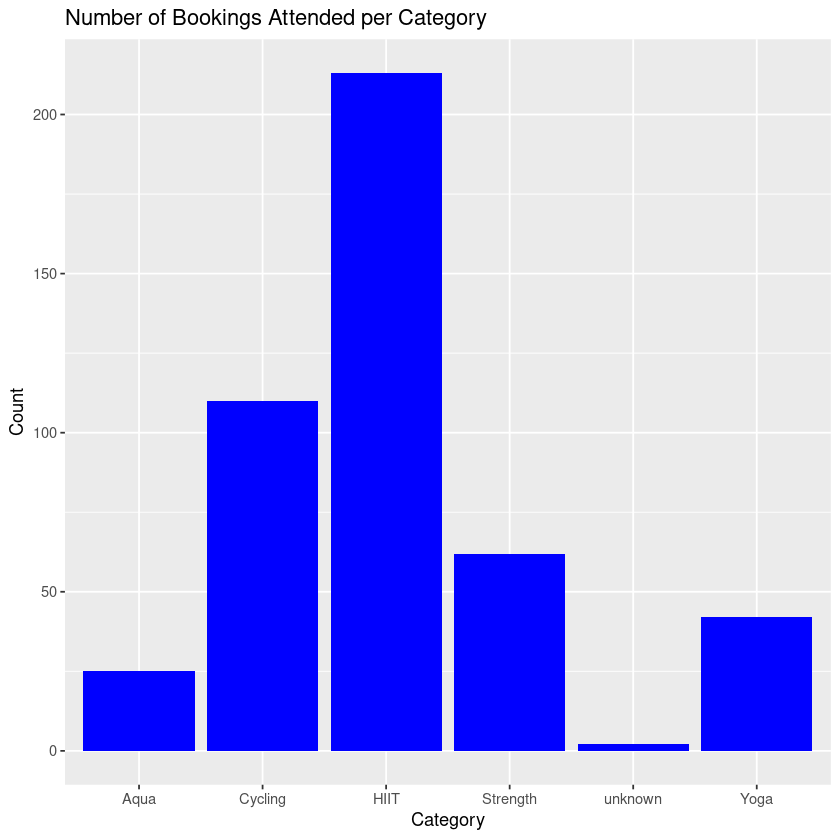

In [4]:
###2. Create a visualization that shows how many bookings attended the class. Use the visualization to:
##a. State which category of the variable attended has the most observations

library(ggplot2)

plot_attendance_by_category <- ggplot(fitness_data[fitness_data$attended == 1, ], aes(x = category)) +
  geom_bar(fill = "blue") +
  labs(title = "Number of Bookings Attended per Category",
       x = "Category",
       y = "Count") 

# Print the chart
plot_attendance_by_category


##b. Explain whether the observations are balanced across categories of the variable attended

#We can observe from the findings that the number of attended bookings is not evenly distributed throughout the categories. Following is a breakdown of attended bookings by category:

In [5]:
attended_bookings_by_category <- fitness_data %>%
  filter(attended == 1) %>%
  group_by(category) %>%
  summarise(booking_count = n())
attended_bookings_by_category

category,booking_count
<chr>,<int>
Aqua,25
Cycling,110
HIIT,213
Strength,62
Yoga,42
unknown,2


#The "HIIT" category has the most attended bookings with 213, while the "Aqua" category has the fewest attended bookings with just 25 ("unknown" aside). This shows that there is an uneven distribution of attended reservations among the various sessions and than HIIT is the most famous one. 

## Task 3

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   12.00   15.63   19.00  148.00 

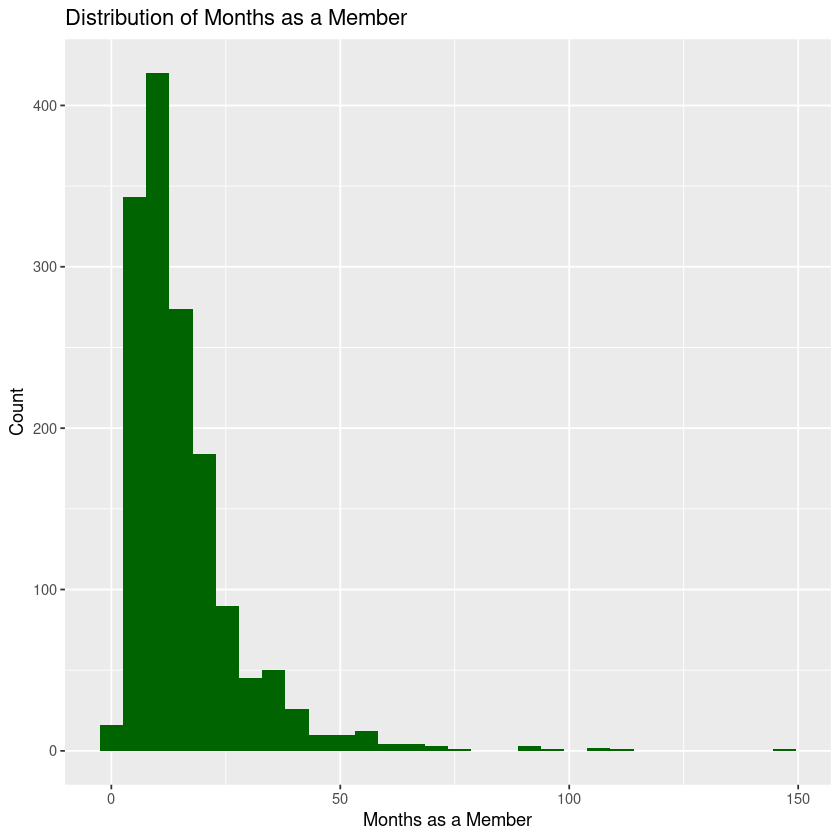

Installing moments [0.14.1] ...
	OK [linked cache]


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   12.00   15.63   19.00  148.00 

[1] 167.0955

[1] 3.136641

[1] 19.86977

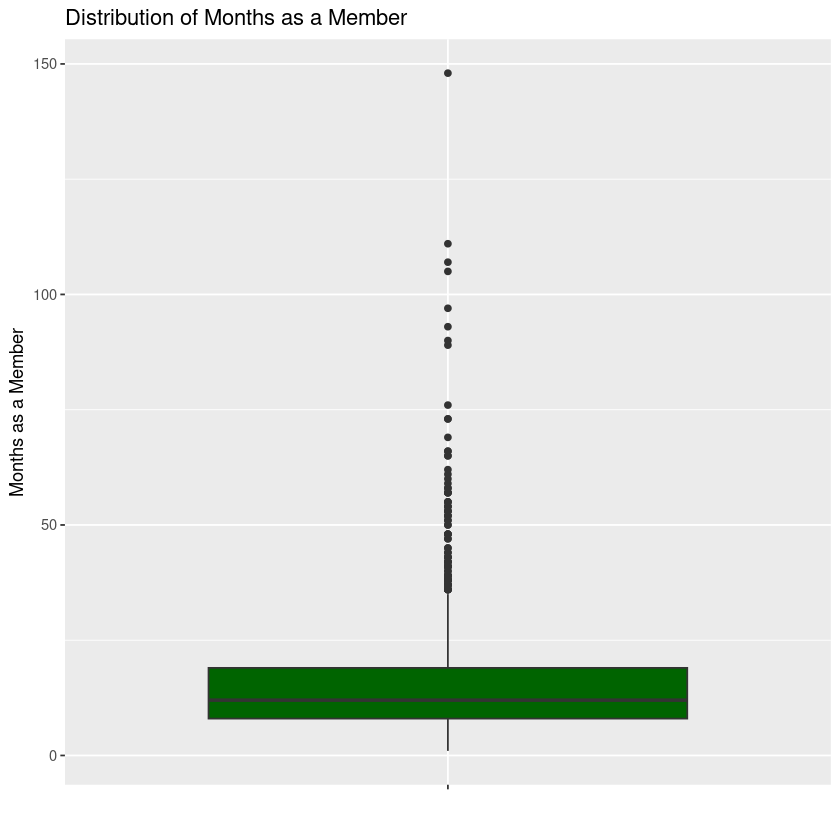

In [13]:
###3. Describe the distribution of the number of months as a member
# Create histogram for the months_as_member
months_as_member_plot <- ggplot(fitness_data, aes(x = months_as_member)) +
  geom_histogram(fill = "darkgreen", bins = 30) +
  labs(title = "Distribution of Months as a Member",
       x = "Months as a Member",
       y = "Count") 

# Print histogram
print(months_as_member_plot)

# Summary statistics for months_as_member 
months_as_member_summary <- summary(fitness_data$months_as_member)
months_as_member_summary

# Create a box plot for the months_as_member column
months_as_member_boxplot <- ggplot(fitness_data, aes(x = "", y = months_as_member)) +
  geom_boxplot(fill = "darkgreen") +
  labs(title = "Distribution of Months as a Member",
       x = "",
       y = "Months as a Member")

# Print the box plot
print(months_as_member_boxplot)

# Calculate variance, skewness, and kurtosis for the months_as_member column
install.packages("moments")
library(moments)

months_as_member_variance <- var(fitness_data$months_as_member)
months_as_member_skewness <- skewness(fitness_data$months_as_member)
months_as_member_kurtosis <- kurtosis(fitness_data$months_as_member)

months_as_member_summary
months_as_member_variance
months_as_member_skewness
months_as_member_kurtosis 

#The distribution is between 1 and 148 months. The median is 12 months which shows that half of the members have been part of the fitness for 12 months or less. The average is higher than the median with 15.63 months which suggest a right-skewed distribution. The quantile shows that half of the members has been in the fitness between 8 and 19 months. The variance of 167.1 shows a wide distribution.the positive skewness of 3.14 confirms the right-skewed distribution. The high kurtosis of 19.87 shows a confirms the existance of extreme values.
#In summary, the majority of the fitness is made of members that have been in the fitness for less the 19 months and only a few members have been in the club for a longer period.


## Task 4

[1] 0.4855262

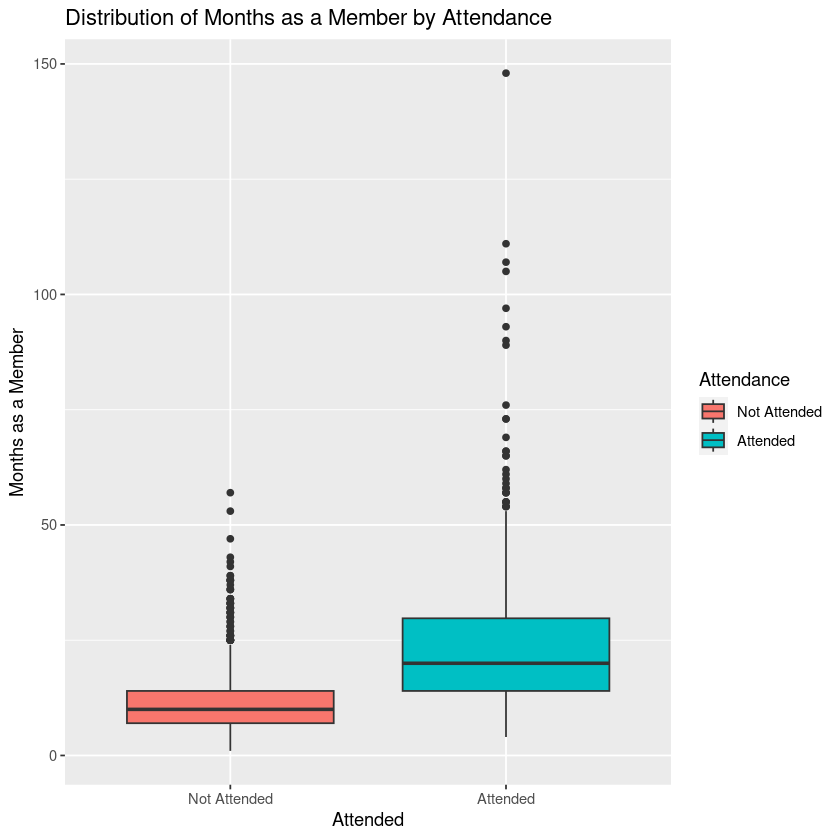

In [7]:
###4. Describe the relationship between attendance and number of months as a member.
attendance_months_boxplot <- ggplot(fitness_data, aes(x = as.factor(attended), y = months_as_member, fill = as.factor(attended))) +
  geom_boxplot() +
  labs(title = "Distribution of Months as a Member by Attendance",
       x = "Attended",
       y = "Months as a Member") +
  scale_x_discrete(labels = c("0" = "Not Attended", "1" = "Attended")) +
  scale_fill_discrete(name = "Attendance", labels = c("Not Attended", "Attended"))

# Print the box plot
attendance_months_boxplot

# Calculate the correlation
cor_attendance_months <- cor(fitness_data$attended, fitness_data$months_as_member)
cor_attendance_months

#The A correlation coefficient of 0.486 shows a moderate positive relationship between attendance and the number of months as a member. This could suggests with a weak relationship that as the months as a member increases, the likelihood of attending fitness classes increase.The boxplot highlights the result.


Task 5

#It is a classification issue to determine if members will attend. Classification aims to predict categorical target variables, in this case, whether or not members will attend or not. 


# Task 6

In [8]:
###6. Fit a baseline model to predict whether members will attend using the data provided.
library(caret)

# Set the seed for reproducibility
set.seed(12)

# Split the dataset into training (80%) and testing (20%) sets
train_index <- createDataPartition(fitness_data$attended, p = 0.8, list = FALSE)
train_data <- fitness_data[train_index, ]
test_data <- fitness_data[-train_index, ]

# Convert the 'attended' variable to a factor
train_data$attended <- as.factor(train_data$attended)
test_data$attended <- as.factor(test_data$attended)

# Preprocess the data and create a model matrix
preprocessor <- preProcess(train_data[, -1], method = c("center", "scale"))
train_processed <- predict(preprocessor, train_data[, -1])
test_processed <- predict(preprocessor, test_data[, -1])
train_matrix <- model.matrix(~ . - 1, data = train_processed)
test_matrix <- model.matrix(~ . - 1, data = test_processed)

# Train a logistic regression model using glm()
glm_model <- glm(attended ~ ., data = cbind(train_data["attended"], as.data.frame(train_matrix)), family = "binomial")
summary(glm_model)
# Predict on the test set
glm_test_predictions <- predict(glm_model, newdata = as.data.frame(test_matrix), type = "response")
glm_test_predictions <- ifelse(glm_test_predictions >= 0.5, 1, 0)

# Evaluate the performance of the model
confusionMatrix(as.factor(glm_test_predictions), test_data$attended)
summary(glm_model)

Loading required package: lattice

Warning message:
“glm.fit: algorithm did not converge”



Call:
glm(formula = attended ~ ., family = "binomial", data = cbind(train_data["attended"], 
    as.data.frame(train_matrix)))

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06   2.409e-06   2.409e-06  

Coefficients: (1 not defined because of singularities)
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)      -2.657e+01  6.676e+04   0.000    1.000
months_as_member -3.072e-09  1.278e+04   0.000    1.000
weight           -6.257e-10  1.169e+04   0.000    1.000
days_before       2.339e-10  5.053e+04   0.000    1.000
day_of_weekFri    4.603e-11  6.634e+04   0.000    1.000
day_of_weekMon    2.989e-10  7.020e+04   0.000    1.000
day_of_weekSat   -6.997e-10  8.602e+04   0.000    1.000
day_of_weekSun   -5.881e-10  1.099e+05   0.000    1.000
day_of_weekThu   -3.230e-10  5.148e+04   0.000    1.000
day_of_weekTue    3.202e-11  5.494e+04   0.000    1.000
day_of_weekWed           NA         NA      NA       NA


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 210   0
         1   0  90
                                     
               Accuracy : 1          
                 95% CI : (0.9878, 1)
    No Information Rate : 0.7        
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0        
            Specificity : 1.0        
         Pos Pred Value : 1.0        
         Neg Pred Value : 1.0        
             Prevalence : 0.7        
         Detection Rate : 0.7        
   Detection Prevalence : 0.7        
      Balanced Accuracy : 1.0        
                                     
       'Positive' Class : 0          
                                     


Call:
glm(formula = attended ~ ., family = "binomial", data = cbind(train_data["attended"], 
    as.data.frame(train_matrix)))

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06   2.409e-06   2.409e-06  

Coefficients: (1 not defined because of singularities)
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)      -2.657e+01  6.676e+04   0.000    1.000
months_as_member -3.072e-09  1.278e+04   0.000    1.000
weight           -6.257e-10  1.169e+04   0.000    1.000
days_before       2.339e-10  5.053e+04   0.000    1.000
day_of_weekFri    4.603e-11  6.634e+04   0.000    1.000
day_of_weekMon    2.989e-10  7.020e+04   0.000    1.000
day_of_weekSat   -6.997e-10  8.602e+04   0.000    1.000
day_of_weekSun   -5.881e-10  1.099e+05   0.000    1.000
day_of_weekThu   -3.230e-10  5.148e+04   0.000    1.000
day_of_weekTue    3.202e-11  5.494e+04   0.000    1.000
day_of_weekWed           NA         NA      NA       NA


#The confusion matrix indicates that the model perfectly predicted attendance for the test dataset. Yet, with the warning message, we need to be cautious with the results and look for a less overfitting model


# Task 7

In [10]:
###7. Fit a comparison model to predict whether members will attend using the data provided. 
install.packages("randomForest")
library(randomForest)

# Fit the Random Forest model
rf_model <- randomForest(attended ~ ., data = train_data, ntree = 500)

# Make predictions on the test dataset
rf_test_predictions <- predict(rf_model, newdata = test_data)

# Evaluate the performance using a confusion matrix
confusionMatrix(rf_test_predictions, test_data$attended)

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/randomForest_4.7-1.1.tar.gz' ...
	OK [downloaded 256.8 Kb in 0.1 secs]
Installing randomForest [4.7-1.1] ...
	OK [installed binary]
Moving randomForest [4.7-1.1] into the cache ...
	OK [moved to cache in 0.33 milliseconds]


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 192  48
         1  18  42
                                          
               Accuracy : 0.78            
                 95% CI : (0.7288, 0.8256)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.0011892       
                                          
                  Kappa : 0.4211          
                                          
 Mcnemar's Test P-Value : 0.0003575       
                                          
            Sensitivity : 0.9143          
            Specificity : 0.4667          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.7000          
             Prevalence : 0.7000          
         Detection Rate : 0.6400          
   Detection Prevalence : 0.8000          
      Balanced Accuracy : 0.6905          
                                          
       'Positive' Class : 0               
                              

#The random forest has a lower accuracy but it does not have the overfitting issue of the regression model.


# Task 8

###8. Explain why you chose the two models used in parts 6 and 7
#For question 6, I used a logistic regression based on the "Machine Learning with caret in R" course as it is a simple method for binary classifications. it provides with good understanding of the model, therefore providing a good starting point before trying more complex models
#for question 7, I used a Random Forest because I like them, but more importantly they are less subject to overfitting which could be an issue in part 6 and is suspicious.


# Task 9

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 210   0
         1   0  90
                                     
               Accuracy : 1          
                 95% CI : (0.9878, 1)
    No Information Rate : 0.7        
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0        
            Specificity : 1.0        
         Pos Pred Value : 1.0        
         Neg Pred Value : 1.0        
             Prevalence : 0.7        
         Detection Rate : 0.7        
   Detection Prevalence : 0.7        
      Balanced Accuracy : 1.0        
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 192  48
         1  18  42
                                          
               Accuracy : 0.78            
                 95% CI : (0.7288, 0.8256)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.0011892       
                                          
                  Kappa : 0.4211          
                                          
 Mcnemar's Test P-Value : 0.0003575       
                                          
            Sensitivity : 0.9143          
            Specificity : 0.4667          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.7000          
             Prevalence : 0.7000          
         Detection Rate : 0.6400          
   Detection Prevalence : 0.8000          
      Balanced Accuracy : 0.6905          
                                          
       'Positive' Class : 0               
                              

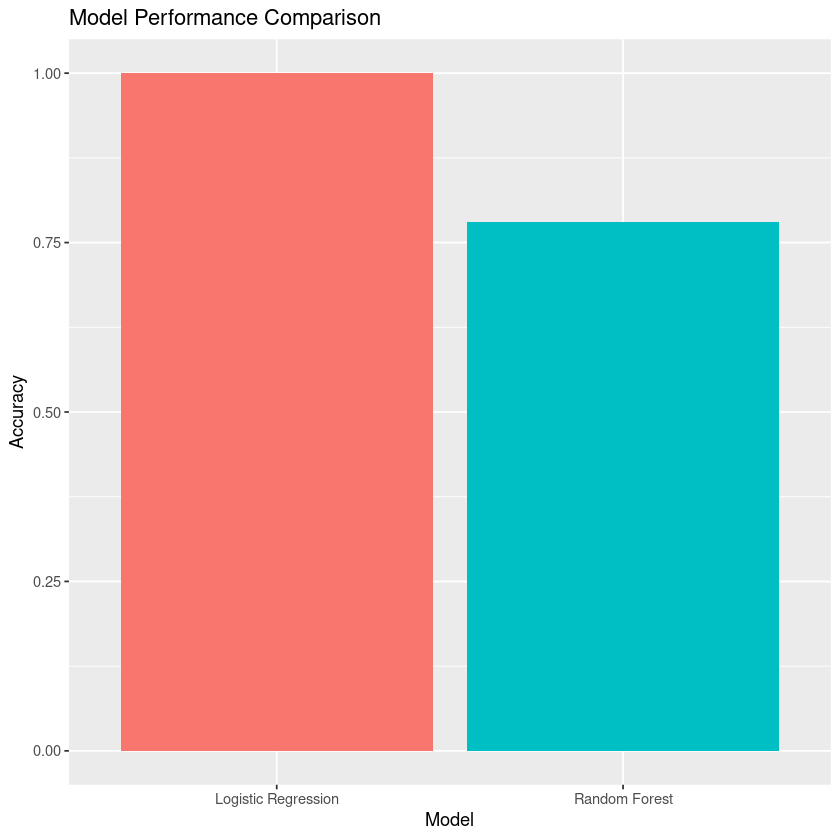

In [11]:
###9. Compare the performance of the two models used in parts 6 and 7, using any method suitable
# Confusion matrices for both models
glm_confusion <- confusionMatrix(factor(glm_test_predictions), test_data$attended)
rf_confusion <- confusionMatrix(factor(rf_test_predictions), test_data$attended)

glm_confusion 
rf_confusion

# Create a data frame for plotting
model_comparison <- data.frame(
  Model = c("Logistic Regression", "Random Forest"),
  Accuracy = c(glm_confusion$overall["Accuracy"], rf_confusion$overall["Accuracy"])
)

# Create a bar plot to compare accuracy of both models
ggplot(model_comparison, aes(x = Model, y = Accuracy, fill = Model)) +
  geom_bar(stat = "identity") +
  ylim(0, 1) +
  labs(title = "Model Performance Comparison", x = "Model", y = "Accuracy") +
  theme(legend.position = "none")

# Task 10

###10. Explain which model performs better and why.
#looking only at both results and the bar plot, it appears that the logistic regression is a better model with perfect scores. Although these scores seems suspicious. The random forest model has a lower accuracy but the results are more realistic, which might be more reliable. 
